In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_excel(r'C:\Users\FLUTE\Dropbox\Project\TPPS_Perf.xlsx')

In [4]:
df1=df[['MW', 'MUG', 'PLFC','AFC', 'L','PLFM','AVFM','Total','SOC','TOC','FO','PO','RSD',
                 'CR', 'CC','SCC', 'GCV', 'HR', 'TL', 'SRWC', 'SFWC', 'SDWC', 'SLOC', 'MUL','AC', 'PAC', 'NG']]
df1.head()

,MW,MUG,PLFC,AFC,L,PLFM,AVFM,Total,SOC,TOC,...,HR,TL,SRWC,SFWC,SDWC,SLOC,MUL,AC,PAC,NG
0,420,237.404,78.506614,95.97,81.803286,84.14,84.14,583.0,2.455729,1.59,...,2725.0,1.64,5.88,2.20,0.08,0.019,0.000,24.041,10.126620,213.363
1,420,213.522,68.331413,86.72,78.795449,70.60,70.60,687.0,3.217467,1.91,...,2756.0,1.03,4.76,2.38,0.11,0.032,0.000,23.096,10.816684,190.426
2,420,227.244,75.146825,94.37,79.629994,76.96,76.96,627.0,2.759149,1.70,...,2729.0,1.58,4.42,2.13,0.09,0.027,0.000,24.248,10.670469,202.996
3,420,170.155,54.453085,73.88,73.704771,56.68,56.68,811.0,4.766243,3.25,...,2730.0,1.24,5.00,2.48,0.14,0.038,12.955,19.951,11.725192,150.204
4,420,138.150,44.210829,76.64,57.686364,46.23,46.23,2302.0,16.663047,8.93,...,3000.0,1.29,5.00,2.68,0.17,0.042,52.728,19.434,14.067318,118.716


# Standardizing the data

In [5]:
X = df1.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

# Apply PCA

In [6]:
pca = PCA()
X_pca = pca.fit(X_std)

# Determine the number of components

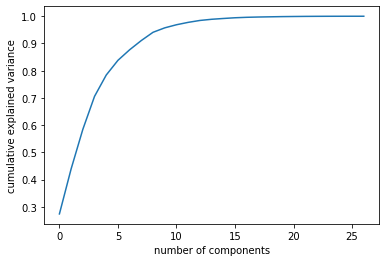

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Dimensionality Reduction

In [8]:
num_components = 5
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

# (optional):
One can do the steps from together by specifying n_components = 0.99 parameter. PCA will select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components

In [9]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

15


# Finding the most important features set:
Now for identifying the most important feature, we have to check which features are contributing most to the components. We can see which features are contributing most to which components.

In [11]:
pd.DataFrame(pca.components_, columns = df1.columns)

,MW,MUG,PLFC,AFC,L,PLFM,AVFM,Total,SOC,TOC,...,HR,TL,SRWC,SFWC,SDWC,SLOC,MUL,AC,PAC,NG
0,-0.103638,-0.249298,-0.332246,-0.320249,-0.292405,-0.316382,-0.315919,0.023001,0.117551,0.023820,...,-0.182178,-0.013187,0.060858,-0.008656,0.024841,0.030024,0.201620,-0.239388,0.043979,-0.249773
1,0.430879,0.332223,-0.117346,-0.090790,-0.173366,-0.122574,-0.116602,0.174496,0.036815,0.185629,...,-0.104237,0.186703,-0.057544,-0.001984,0.073260,-0.031338,0.250479,0.339217,-0.115511,0.331765
2,0.033227,0.005426,-0.070855,0.011188,0.043266,-0.037634,-0.039714,0.200795,0.219400,0.200519,...,0.271251,0.117200,0.267009,0.408985,0.374464,0.330697,-0.127093,0.033148,0.437596,0.001637
3,-0.006367,0.005880,0.075283,-0.012921,0.041499,0.124441,0.140789,-0.380490,-0.364015,-0.373502,...,-0.186749,0.284014,0.042322,0.213169,0.321750,0.217763,0.127225,-0.057630,0.064497,0.012762
4,0.148081,0.088971,-0.076255,-0.132374,-0.016605,-0.020338,-0.020737,-0.139716,-0.197373,-0.135329,...,-0.174014,-0.469994,0.275119,0.196189,-0.073175,0.182603,0.111410,0.091567,0.226245,0.090159
5,-0.095254,-0.105865,0.176860,0.261779,-0.220773,0.178332,0.185439,0.301790,0.190744,0.289077,...,-0.226989,-0.131800,-0.160518,0.092407,0.096354,0.243705,0.173949,-0.069656,0.006165,-0.108494
6,0.043753,0.031286,-0.029846,0.047735,-0.123394,-0.077109,-0.036287,-0.081608,-0.062183,-0.059972,...,-0.023472,-0.106988,-0.139835,0.039735,0.065010,0.166686,-0.072148,0.014966,0.001872,0.031569
7,-0.052660,-0.003279,0.035666,0.027815,0.037131,0.132961,0.090817,0.059711,0.037571,0.060692,...,0.064991,0.094384,0.665888,0.055396,-0.205915,-0.456301,0.158724,-0.004290,0.126447,-0.001786
8,-0.008009,-0.029144,-0.041608,-0.093328,0.031220,-0.036283,-0.082151,0.034725,-0.006338,0.056764,...,0.057467,0.107506,0.026680,-0.060912,0.005457,-0.052695,0.022908,0.051625,0.079591,-0.035543
9,0.050287,-0.013429,-0.070609,-0.034209,0.157736,-0.153201,-0.118173,-0.080976,0.061946,-0.090242,...,0.511882,0.027392,-0.218387,-0.225194,0.056852,0.131397,0.287452,0.030910,0.092531,-0.006102


# One can automate this process of extracting important features :

In [14]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df1.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [15]:
print(most_important_names)

['PLFC', 'MW', 'PAC', 'Total', 'SCC', 'PO', 'FO', 'SRWC', 'CR', 'HR', 'MUL', 'MUL', 'SOC', 'SFWC', 'HR']
